#### Suppose we have relatively high infant mortality which decays as we age. Also assume we have high old-age mortality, which grows as we age. What then?

#### Let $r$ be infant mortality: assume $r_a = r_0 e^{-\lambda_1 a}$. 

#### Let $R$ be old age mortality: assume $R_a = R_\infty (1 - e^{-\lambda_2 (a-A)})$

#### Then the probability of surviving from age $a$ to $a+1$ is $s_a = [1-r_a][1-R_a] = [1-r_0e^{-\lambda_1 a}][1-R_\infty(1-e^{-\lambda_2 (a-A)})]$

#### What does $\frac{1}{s_0 \cdots s_{a-1}}$ look like?

In [35]:
import matplotlib.pyplot as plt

In [11]:
def r(a, r0, l1):
    return r0*(e^(-l1*a))
    
def R(a, Rinfty, l2, A):
    if a < A:
        return 0
    else:
        return Rinfty*(1 - e^(-l2*a))
    

In [51]:
def s(a, r0 = 0.3, Rinfty = 0.3, l1 = 0.2, l2 = 0.2, A = 20):
    return ((1 - r(a, r0, l1))*(1 - R(a, Rinfty, l2, A))).n()

In [27]:
s(1)

0.754380774076606

In [32]:
def get_surv_vec(s, num_days):
    surv = [0]*num_days
    for k in range(num_days):
        surv[k] = s(k)
    return surv

In [33]:
def inverse_surv(s, num_days):
    surv = get_surv_vec(s, num_days)
    inv_surv = [1/prod(surv[:k]) for k in range(num_days)]
    return inv_surv

In [34]:
inverse_surv(s, 10)

[1,
 1.42857142857143,
 1.89370073795964,
 2.37037337489377,
 2.83755899291891,
 3.27965174996155,
 3.68650901258896,
 4.05270433948200,
 4.37647173205209,
 4.65864073494407]

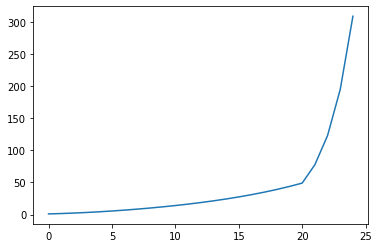

In [58]:
plt.plot(inverse_surv(s, 25))

#### Most of the time, there will be some age-independent death event that occurs as well. So let's call $r_{\text{const}}<1$ that risk. Then the updated survival probability is $s_a = (1-r_{\text{const}}) s_a$.

In [79]:
def s(a, rconst = 0.04, r0 = 0.3, Rinfty = 0.3, l1 = 0.2, l2 = 0.2, A = 20):
    return ((1 - rconst)*(1 - r(a, r0, l1))*(1 - R(a, Rinfty, l2, A))).n()

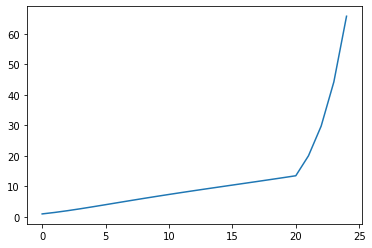

In [81]:
plt.plot(inverse_surv(s ,25))